In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customers_.csv")



In [2]:
df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Data cleaning & preprocessing

In [5]:
df.drop(columns=["customerID"], inplace=True)

# object to numeric 
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.assign(TotalCharges = df["TotalCharges"].fillna(0))

#  Label Encoding
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le

# One-Hot Encoding 
multi_class_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
                    "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)  

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


##### Feature Selection

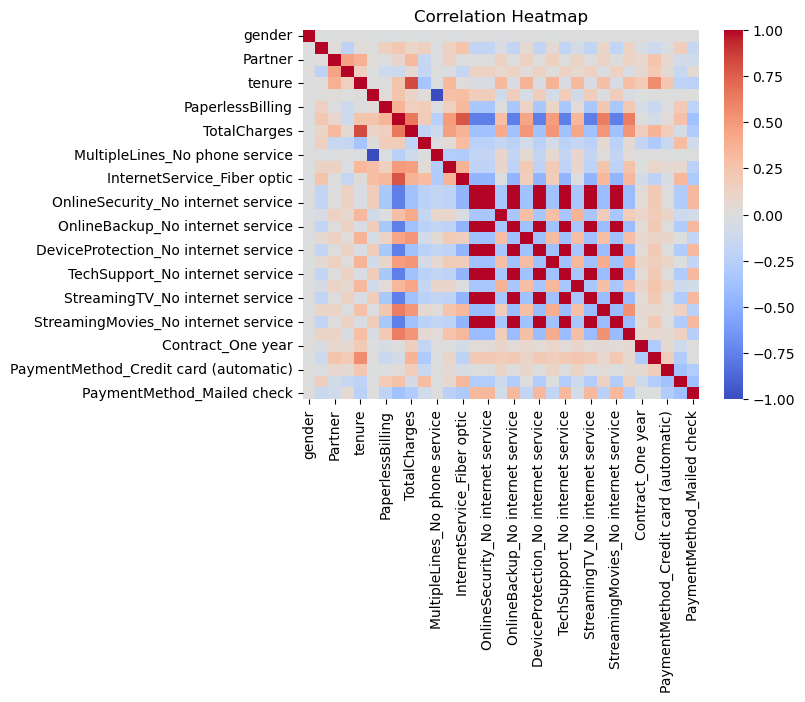

Churn                                    1.000000
tenure                                   0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                        0.302253
PaymentMethod_Electronic check           0.301919
OnlineBackup_No internet service         0.227890
TechSupport_No internet service          0.227890
StreamingMovies_No internet service      0.227890
DeviceProtection_No internet service     0.227890
StreamingTV_No internet service          0.227890
InternetService_No                       0.227890
OnlineSecurity_No internet service       0.227890
TotalCharges                             0.198324
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
Contract_One year                        0.177820
OnlineSecurity_Yes                       0.171226
TechSupport_Yes                          0.164674
Dependents                               0.164221
SeniorCitizen                            0.150889


In [7]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

churn_corr = corr_matrix["Churn"].abs().sort_values(ascending=False)
churn_corr


##### Selecting most relevent features

In [8]:
selected_features = churn_corr[churn_corr > 0.1].index.tolist()

df_selected = df[selected_features]




In [9]:
df_selected.shape

(7043, 22)

In [10]:
df_selected.head()

,Churn,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,OnlineBackup_No internet service,TechSupport_No internet service,StreamingMovies_No internet service,DeviceProtection_No internet service,StreamingTV_No internet service,...,TotalCharges,MonthlyCharges,PaperlessBilling,Contract_One year,OnlineSecurity_Yes,TechSupport_Yes,Dependents,SeniorCitizen,Partner,PaymentMethod_Credit card (automatic)
0,0,1,False,False,True,False,False,False,False,False,...,29.85,29.85,1,False,False,False,0,0,1,False
1,0,34,False,False,False,False,False,False,False,False,...,1889.50,56.95,0,True,True,False,0,0,0,False
2,1,2,False,False,False,False,False,False,False,False,...,108.15,53.85,1,False,True,False,0,0,0,False
3,0,45,False,False,False,False,False,False,False,False,...,1840.75,42.30,0,True,True,True,0,0,0,False
4,1,2,True,False,True,False,False,False,False,False,...,151.65,70.70,1,False,False,False,0,0,0,False
